In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Barents = pd.read_excel(filepath, sheet_name='Barents-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Barents)
fp.date_time(Barents)

,Extent,Date
0,1107873.946,1979-01-01
1,1211101.473,1979-02-01
2,1215128.770,1979-03-01
3,1233940.811,1979-04-01
4,1193061.566,1979-05-01
...,...,...
533,124025.343,2023-06-01
534,53107.426,2023-07-01
535,11242.827,2023-08-01
536,3272.024,2023-09-01


In [5]:
scaler = MinMaxScaler()
Barents['Extent'] = scaler.fit_transform(Barents['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 12
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Barents['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((515, 12, 1), (515,))

In [8]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Barents_model_LT12/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
50/53 [===========================>..] - ETA: 0s - loss: 0.1988 - root_mean_squared_error: 0.4459

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 9s 110ms/step - loss: 0.1997 - root_mean_squared_error: 0.4469 - val_loss: 0.0660 - val_root_mean_squared_error: 0.2568
Epoch 2/50
47/53 [=========================>....] - ETA: 0s - loss: 0.1410 - root_mean_squared_error: 0.3755

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 5s 102ms/step - loss: 0.1405 - root_mean_squared_error: 0.3749 - val_loss: 0.0519 - val_root_mean_squared_error: 0.2278
Epoch 3/50
52/53 [============================>.] - ETA: 0s - loss: 0.1056 - root_mean_squared_error: 0.3250

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.1060 - root_mean_squared_error: 0.3257 - val_loss: 0.0417 - val_root_mean_squared_error: 0.2043
Epoch 4/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0838 - root_mean_squared_error: 0.2895

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 6s 108ms/step - loss: 0.0840 - root_mean_squared_error: 0.2898 - val_loss: 0.0347 - val_root_mean_squared_error: 0.1863
Epoch 5/50
53/53 [==============================] - ETA: 0s - loss: 0.0637 - root_mean_squared_error: 0.2523

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 5s 104ms/step - loss: 0.0637 - root_mean_squared_error: 0.2523 - val_loss: 0.0301 - val_root_mean_squared_error: 0.1734
Epoch 6/50
52/53 [============================>.] - ETA: 0s - loss: 0.0501 - root_mean_squared_error: 0.2239

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 6s 109ms/step - loss: 0.0503 - root_mean_squared_error: 0.2243 - val_loss: 0.0274 - val_root_mean_squared_error: 0.1654
Epoch 7/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0416 - root_mean_squared_error: 0.2039

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 6s 106ms/step - loss: 0.0411 - root_mean_squared_error: 0.2027 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1606
Epoch 8/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0314 - root_mean_squared_error: 0.1771

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 5s 101ms/step - loss: 0.0316 - root_mean_squared_error: 0.1778 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1570
Epoch 9/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0246 - root_mean_squared_error: 0.1569

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 6s 110ms/step - loss: 0.0253 - root_mean_squared_error: 0.1589 - val_loss: 0.0237 - val_root_mean_squared_error: 0.1541
Epoch 10/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0234 - root_mean_squared_error: 0.1529

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 5s 102ms/step - loss: 0.0233 - root_mean_squared_error: 0.1527 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1460
Epoch 11/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0220 - root_mean_squared_error: 0.1484

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 5s 105ms/step - loss: 0.0224 - root_mean_squared_error: 0.1495 - val_loss: 0.0187 - val_root_mean_squared_error: 0.1368
Epoch 12/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0253 - root_mean_squared_error: 0.1591

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0246 - root_mean_squared_error: 0.1569 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1290
Epoch 13/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.1322

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.0179 - root_mean_squared_error: 0.1338 - val_loss: 0.0142 - val_root_mean_squared_error: 0.1193
Epoch 14/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0202 - root_mean_squared_error: 0.1422

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 6s 114ms/step - loss: 0.0199 - root_mean_squared_error: 0.1410 - val_loss: 0.0121 - val_root_mean_squared_error: 0.1102
Epoch 15/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0181 - root_mean_squared_error: 0.1347 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1160
Epoch 16/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0221 - root_mean_squared_error: 0.1488 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1116
Epoch 17/50
52/53 [============================>.] - ETA: 0s - loss: 0.0189 - root_mean_squared_error: 0.1374

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 6s 114ms/step - loss: 0.0192 - root_mean_squared_error: 0.1385 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1094
Epoch 18/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0192 - root_mean_squared_error: 0.1384

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 5s 100ms/step - loss: 0.0198 - root_mean_squared_error: 0.1407 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0892
Epoch 19/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0173 - root_mean_squared_error: 0.1316 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0931
Epoch 20/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0180 - root_mean_squared_error: 0.1342 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0929
Epoch 21/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0168 - root_mean_squared_error: 0.1296 - val_loss: 0.0091 - val_root_mean_squared_error: 0.0953
Epoch 22/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0205 - root_mean_squared_error: 0.1431

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0207 - root_mean_squared_error: 0.1438 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0862
Epoch 23/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.1290

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 6s 106ms/step - loss: 0.0175 - root_mean_squared_error: 0.1323 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0811
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0194 - root_mean_squared_error: 0.1394 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0866
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0204 - root_mean_squared_error: 0.1427 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0882
Epoch 26/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0184 - root_mean_squared_error: 0.1357 - val_loss: 0.0089 - val_root_mean_squared_error: 0.0943
Epoch 27/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0194 - root_mean_squared_error: 0.1392 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0916
Epoch 28/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0197 - root_mean_squared_error: 0.1405 - val_loss: 0.0083 - val_root_mean_square

INFO:tensorflow:Assets written to: Barents_model_LT12\assets


INFO:tensorflow:Assets written to: Barents_model_LT12\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0180 - root_mean_squared_error: 0.1342 - val_loss: 0.0066 - val_root_mean_squared_error: 0.0810
Epoch 43/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0189 - root_mean_squared_error: 0.1374 - val_loss: 0.0071 - val_root_mean_squared_error: 0.0846
Epoch 44/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0180 - root_mean_squared_error: 0.1342 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0835
Epoch 45/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0179 - root_mean_squared_error: 0.1338 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0891
Epoch 46/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0176 - root_mean_squared_error: 0.1326 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0862
Epoch 47/50
53/53 [==============================] - 1s 10ms/step - loss: 0.0184 - root_mean_squared_error: 0.1356 - val_loss: 0.0071 - val_root_mean_square

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.9998239676157634 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

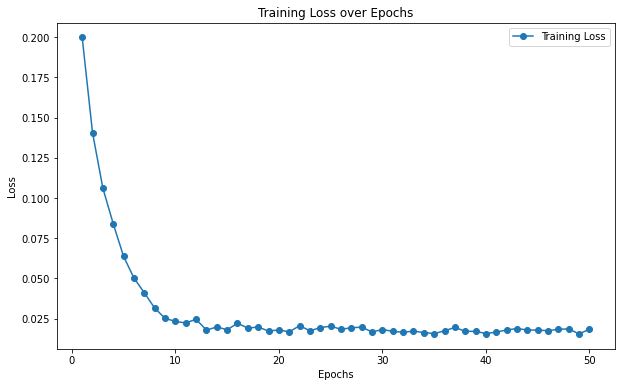

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

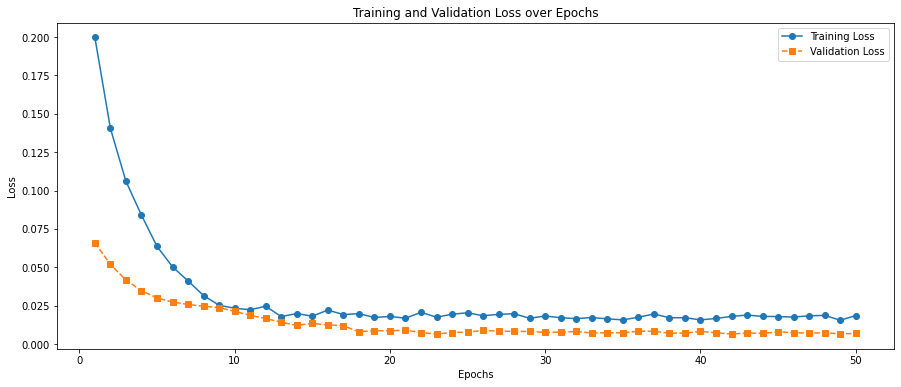

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Barents_model_LT12/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.10436532005999216
MAE : 0.07768506780399918


In [19]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [20]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,647695.062500,657891.340
1,465660.062500,432215.421
2,234175.328125,201834.787
3,129683.609375,55041.511
4,44143.292969,5387.468
5,27946.277344,1576.813
6,54378.312500,21681.895
7,261960.046875,37772.681
8,410764.468750,239568.531
9,584676.562500,427703.330


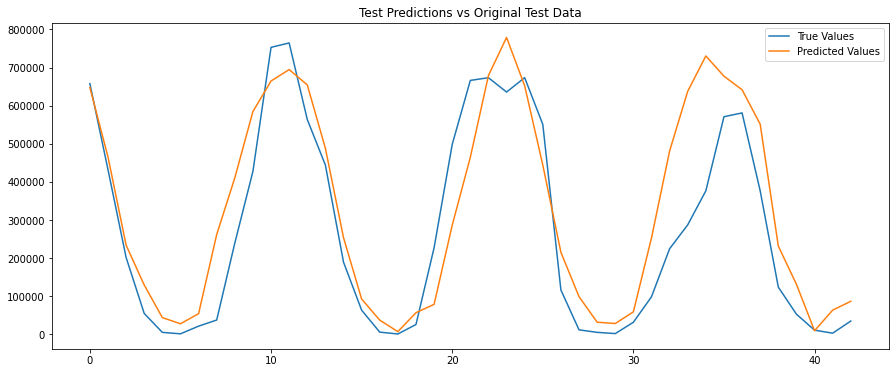

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

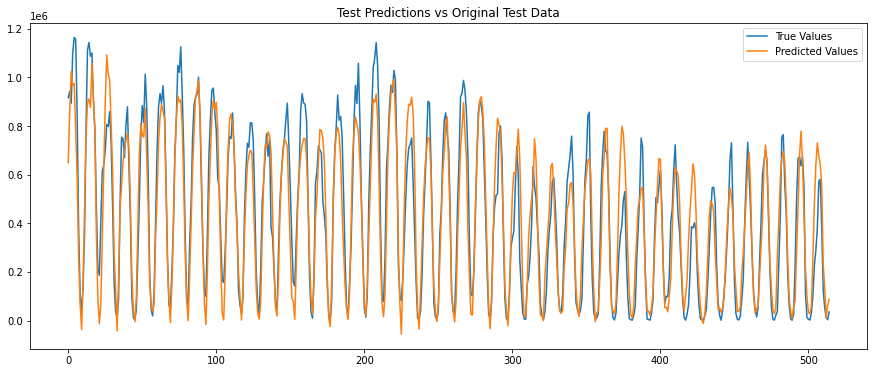

In [24]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()